In [7]:
import scanpy as sc, pandas as pd, numpy as np, anndata as ad

In [2]:
adata = sc.read_h5ad("/Users/Ray/DATA/PUBLISHED/Allen Institute/MM_CTX_HIP_SMARTSEQ/outs/adata.h5ad")

In [21]:
tsne_coord = pd.read_csv("/Users/Ray/DATA/PUBLISHED/Allen Institute/MM_CTX_HIP_SMARTSEQ/tsne.csv", 
                         index_col='sample_name').reindex(adata.obs_names)

In [18]:
adata.obs

,exp_component_name,platform_label,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,subclass_order,...,injection_method_label,injection_roi_color,injection_roi_id,injection_roi_label,injection_type_color,injection_type_id,injection_type_label,cortical_layer_label,outlier_call,outlier_type
sample_name,,,,,,,,,,,,,,,,,,,,,
F2S4_150430_003_E01,US-1250273_E1_S37,SS,#0A75B1,253.0,253_L5 PT CTX,#00ADEE,2.0,Glutamatergic,#0D5B78,23.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
F2S4_150422_002_A01,US-1250273_E2_S01,SS,#0A75B1,253.0,253_L5 PT CTX,#00ADEE,2.0,Glutamatergic,#0D5B78,23.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
F2S4_150422_002_B01,US-1250273_E2_S02,SS,#0A75B1,253.0,253_L5 PT CTX,#00ADEE,2.0,Glutamatergic,#0D5B78,23.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
F2S4_150422_002_C01,US-1250273_E2_S03,SS,#4EA8AC,206.0,206_L5 IT CTX,#00ADEE,2.0,Glutamatergic,#50B2AD,18.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
F2S4_150422_002_D01,US-1250273_E2_S04,SS,#0D5D7E,242.0,242_L5 PT CTX,#00ADEE,2.0,Glutamatergic,#0D5B78,23.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2S4_181213_144_D01,SM-GE5P9_S140_E1-50,SS,#07D8D8,192.0,192_L4/5 IT CTX,#00ADEE,2.0,Glutamatergic,#00E5E5,17.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,All,False,NaN
F2S4_181213_144_E01,SM-GE5P9_S141_E1-50,SS,#02F970,183.0,183_L2/3 IT CTX,#00ADEE,2.0,Glutamatergic,#0BE652,15.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,All,False,NaN
F2S4_181213_144_F01,SM-GE5P9_S142_E1-50,SS,#02F970,183.0,183_L2/3 IT CTX,#00ADEE,2.0,Glutamatergic,#0BE652,15.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,All,False,NaN


In [31]:
adata.obsm['X_tsne'] = tsne_coord

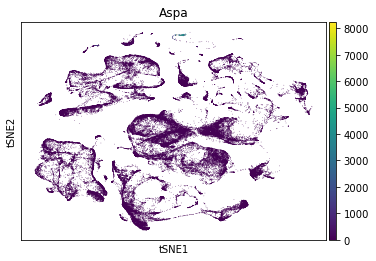

In [33]:
sc.pl.tsne(adata, color=['Aspa'])

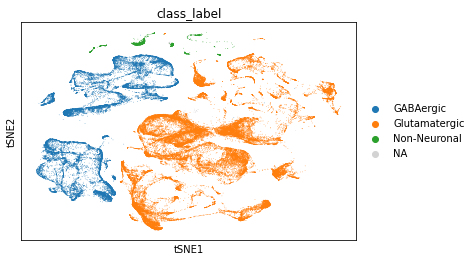

In [35]:
sc.pl.tsne(adata, color=['class_label'])

In [34]:
adata.obs

,exp_component_name,platform_label,cluster_color,cluster_order,cluster_label,class_color,class_order,class_label,subclass_color,subclass_order,...,injection_method_label,injection_roi_color,injection_roi_id,injection_roi_label,injection_type_color,injection_type_id,injection_type_label,cortical_layer_label,outlier_call,outlier_type
sample_name,,,,,,,,,,,,,,,,,,,,,
F2S4_150430_003_E01,US-1250273_E1_S37,SS,#0A75B1,253.0,253_L5 PT CTX,#00ADEE,2.0,Glutamatergic,#0D5B78,23.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
F2S4_150422_002_A01,US-1250273_E2_S01,SS,#0A75B1,253.0,253_L5 PT CTX,#00ADEE,2.0,Glutamatergic,#0D5B78,23.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
F2S4_150422_002_B01,US-1250273_E2_S02,SS,#0A75B1,253.0,253_L5 PT CTX,#00ADEE,2.0,Glutamatergic,#0D5B78,23.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
F2S4_150422_002_C01,US-1250273_E2_S03,SS,#4EA8AC,206.0,206_L5 IT CTX,#00ADEE,2.0,Glutamatergic,#50B2AD,18.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
F2S4_150422_002_D01,US-1250273_E2_S04,SS,#0D5D7E,242.0,242_L5 PT CTX,#00ADEE,2.0,Glutamatergic,#0D5B78,23.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,L4/5/6,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2S4_181213_144_D01,SM-GE5P9_S140_E1-50,SS,#07D8D8,192.0,192_L4/5 IT CTX,#00ADEE,2.0,Glutamatergic,#00E5E5,17.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,All,False,NaN
F2S4_181213_144_E01,SM-GE5P9_S141_E1-50,SS,#02F970,183.0,183_L2/3 IT CTX,#00ADEE,2.0,Glutamatergic,#0BE652,15.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,All,False,NaN
F2S4_181213_144_F01,SM-GE5P9_S142_E1-50,SS,#02F970,183.0,183_L2/3 IT CTX,#00ADEE,2.0,Glutamatergic,#0BE652,15.0,...,NaN,#FF7373,1,NaN,#3DCCCC,2,ZZ_Missing,All,False,NaN


In [30]:
adata

AnnData object with n_obs × n_vars = 74973 × 45768
    obs: 'exp_component_name', 'platform_label', 'cluster_color', 'cluster_order', 'cluster_label', 'class_color', 'class_order', 'class_label', 'subclass_color', 'subclass_order', 'subclass_label', 'full_genotype_color', 'full_genotype_id', 'full_genotype_label', 'sex_color', 'sex_id', 'donor_sex_label', 'region_color', 'region_id', 'region_label', 'cell_type_accession_color', 'cell_type_accession_id', 'cell_type_accession_label', 'cell_type_alias_color', 'cell_type_alias_id', 'cell_type_alias_label', 'cell_type_alt_alias_color', 'cell_type_alt_alias_id', 'cell_type_alt_alias_label', 'cell_type_designation_color', 'cell_type_designation_id', 'cell_type_designation_label', 'neighborhood_label', 'neighborhood_id', 'neighborhood_color', 'external_donor_name_color', 'external_donor_name_id', 'external_donor_name_label', 'facs_population_plan_color', 'facs_population_plan_id', 'facs_population_plan_label', 'injection_materials_color', 'inj